# Interactive density segmentation

As done in `rna_segmentation.ipynb`, it is useful to separate regions of the tissue slice by RNA density. However, the density segmentation (using `st.pp.segmentation.segment_densities`) is usually done by trial-and-error, testing different hyperparamters until it yields a qualitatively "reasonable" segmentation.

An alternative to this process is to first segment the tissue in to many regions (many more than you'd expect) and manually select labels that we want to merge together. This will be the method that is showcased in this notebook.

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/Users/josephmin/Documents/GitHub/spateo-release')

import matplotlib.pyplot as plt
import numpy as np
import skimage
import sklearn
import spateo as st

plt.style.use('default')
plt.rcParams['image.interpolation'] = 'none'
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data

In [5]:
adata = st.io.read_bgi_agg('data/SS200000135TL_D1_all_bin1.txt.gz', 'data/SS200000135IL-D1.ssDNA.tif', scale=0.5, scale_unit='um')
adata

AnnData object with n_obs × n_vars = 2001 × 2001
    uns: '__type', 'pp', 'spatial'
    layers: 'stain', 'spliced', 'unspliced'

(<Figure size 400x400 with 1 Axes>,
 <AxesSubplot:title={'center':'unspliced'}, xlabel='um', ylabel='um'>)

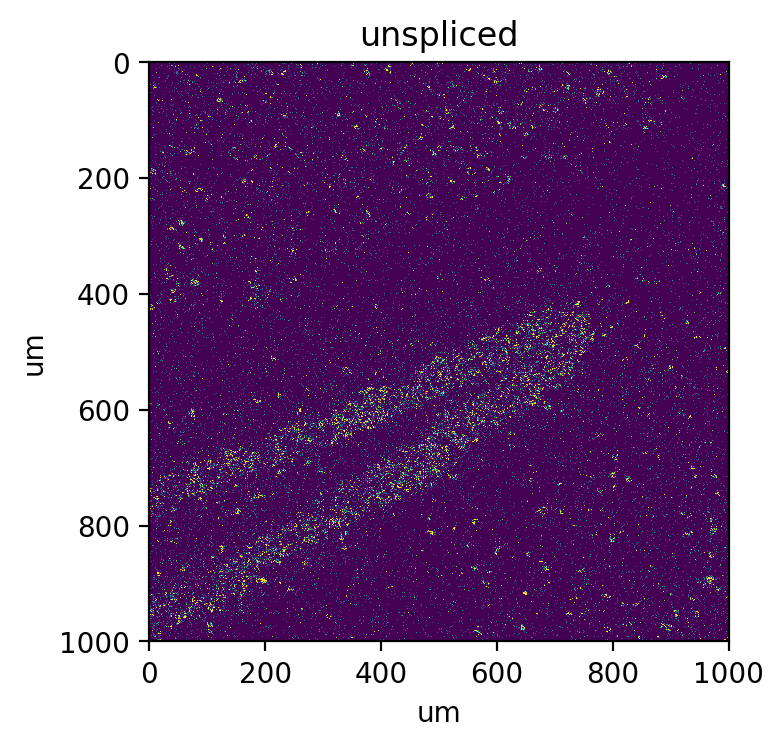

In [10]:
st.pl.imshow(adata, 'unspliced', vmax=5)

## Segment into many density bins

The `st.pl.contours` function is an interactive plotting function that displays contours for each of the density bins. You can hover your mouse over each bin to identify what label they were assigned.

(Note that the following Plotly plot does not render on Github.)

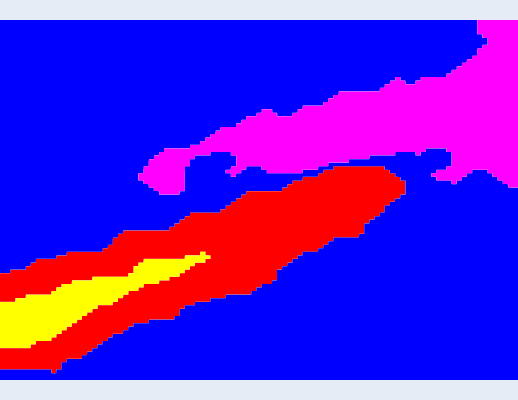

In [13]:
st.pp.segmentation.segment_densities(adata, 'unspliced', 20, k=7, dk=3, distance_threshold=1, background=False)

st.pl.contours(adata, 'unspliced_bins')

By visual inspection, we would like to combine bins `3` and `4` into bin `2`.

(<Figure size 400x400 with 1 Axes>,
 <AxesSubplot:title={'center':'unspliced_bins'}, xlabel='um', ylabel='um'>)

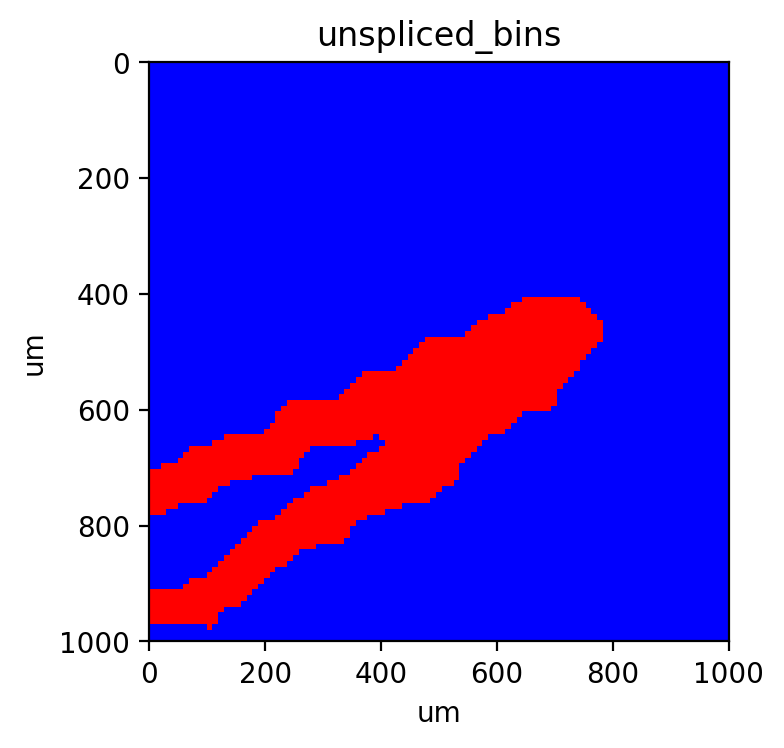

In [17]:
mapping = {3: 2, 4: 2}
st.pp.segmentation.merge_densities(adata, 'unspliced', mapping)

st.pl.imshow(adata, 'unspliced_bins', labels=True)